In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pylab
from scipy.stats import linregress
from scipy.optimize import curve_fit
%matplotlib inline

def linefit(x ,y):
    xmu = np.mean(x)
    ymu = np.mean(y)
    linfit = []
    linfit.append(np.sum((x - xmu)*y)/np.sum((x-xmu)**2))
    linfit.append(ymu - (np.sum((x-xmu)*y)/np.sum((x-xmu)**2))*xmu)
    return linfit
def getrms(residuals):
    N = len(residuals)
    return np.sqrt((1./N)*np.sum(np.asarray(residuals)**2))

def expfunc(x, a, b, c):
    return a*np.exp(-b*x) + c


def noise(x,m,b,o):
    y = []
    e1 = (np.random.normal(0,.05,6)).tolist() #in millimeters
    e2 = (np.random.normal(0,.25,6)).tolist() #in millimeters

    if o == 0:
        y0 = m*x[0] + b + e1[0]
        y1 = m*x[1] + b + e2[0]
        y2 = m*x[2] + b + e1[1]
        y3 = m*x[3] + b + e2[1]
        y4 = m*x[4] + b + e1[2]
        y5 = m*x[5] + b + e2[2]
    if o == 1:
        y0 = m*x[0] + b + e2[0]
        y1 = m*x[1] + b + e1[0]
        y2 = m*x[2] + b + e2[1]
        y3 = m*x[3] + b + e1[1]
        y4 = m*x[4] + b + e2[2]
        y5 = m*x[5] + b + e1[2]
        
    if o == 2:
        y0 = m*x[0] + b + e1[0]
        y1 = m*x[1] + b + e1[1]
        y2 = m*x[2] + b + e1[2]
        y3 = m*x[3] + b + e1[3]
        y4 = m*x[4] + b + e1[4]
        y5 = m*x[5] + b + e1[5]
        
    y.extend([y0,y1,y2,y3,y4,y5])

    linefit1 = linefit(np.asarray(x), np.asarray(y))
    ydut = linefit1[0]*xdut + linefit1[1]
    return ydut - m*(xdut) - b

def err(residuals):
    N = len(residuals)
    residuals = abs(np.asarray(residuals))
    return (((1./N)*(np.sum(residuals**2)))**(-1/2))*np.sqrt(np.var(residuals)/N)*((1./N)*np.sum(residuals))
#y = num1*y15
#m = (n*sum(x*y) - (sum(x)*sum(y)))/(n*sum(x**2) - sum(x)**2)
#b = (sum(x**2)*sum(y) - sum(x)*sum(x*y))/(n*sum(x**2) - sum(x)**2)
#s = np.sqrt(sum((y - m*x - b)**2)/(n-2))
#ey = 2.132*s*np.sqrt(1./n + n*(x_i1[num1]-np.mean(x))**2/(n*sum(x**2) - sum(x)**2))
#totey1[num1] += ey

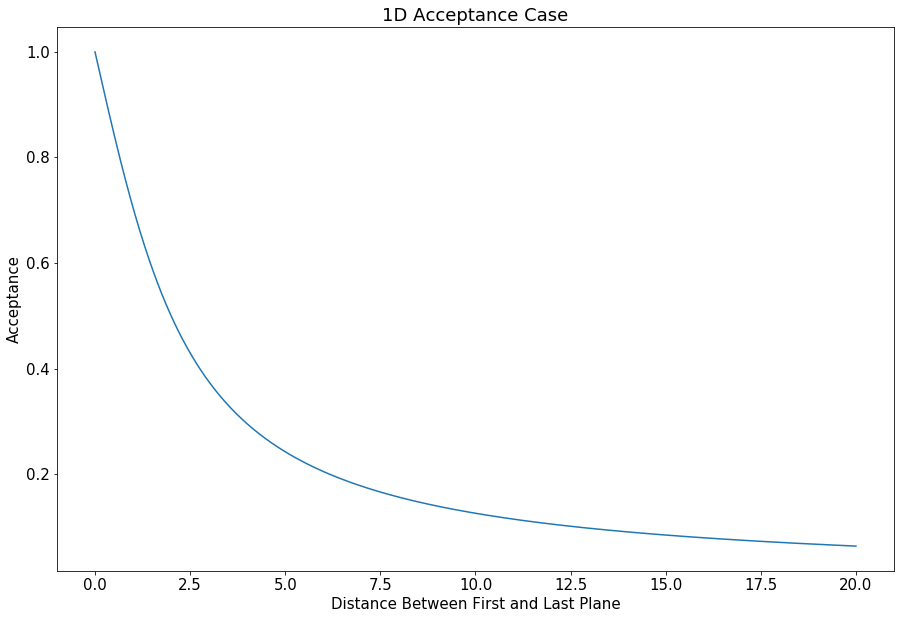

In [26]:
#1D acceptance
def acceptance(x1, w):
    return (2*np.arctan(w/(2.*x1)))/(np.pi)
x = np.linspace(.000001, 20, 2000)

plt.figure(figsize = (15,10))
pylab.rc('font', size=15)
plt.plot(x, acceptance(x, 4))
plt.title('1D Acceptance Case')
plt.ylabel('Acceptance')
plt.xlabel('Distance Between First and Last Plane')
plt.show()

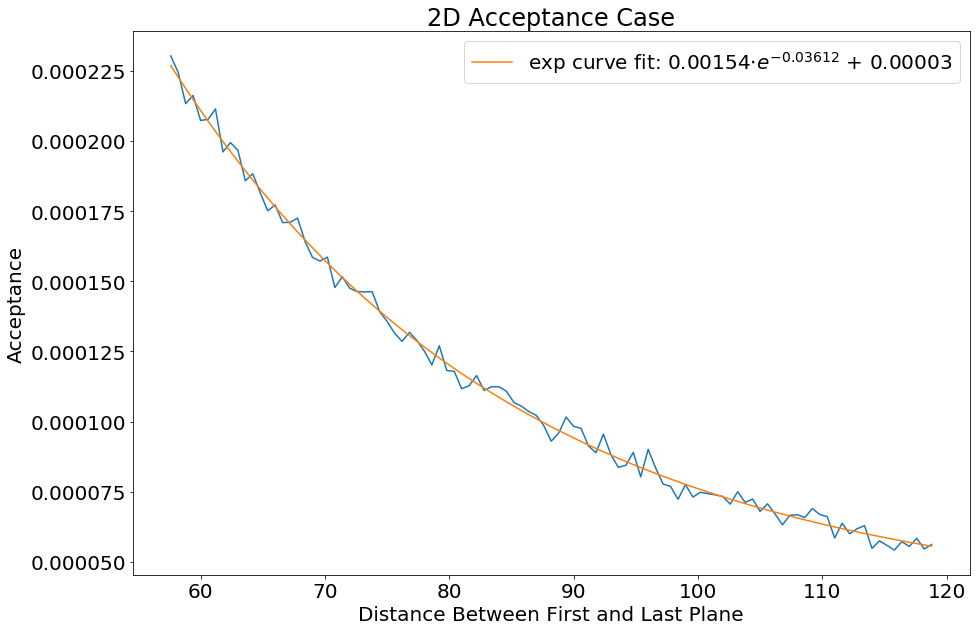

0.00154038076525 0.0361169474337 3.44906459582e-05
0.000210893102418
0.0002303


In [27]:
#exponential curve fit of the acceptance

#np.savetxt('finaldat.txt', np.transpose(np.asarray(acc)))
acc100001000 = np.loadtxt('acc100001000.txt', unpack = True)

plt.figure(figsize = (15,10))
pylab.rc('font', size=20)
xdist6 = [(x*6. + 60.)*.1 for x in range(86,189)]
popt, pcov = curve_fit(expfunc, xdist6, acc100001000, p0=[.05 , .05 , .05])
plt.plot(xdist6, acc100001000)
plt.plot(xdist6, expfunc(np.asarray(xdist6), *popt), label ='exp curve fit: 0.00154$\cdot e^{-0.03612}$ + 0.00003')
plt.legend()
plt.title('2D Acceptance Case')
plt.ylabel('Acceptance')
plt.xlabel('Distance Between First and Last Plane')
plt.show()

print(*popt)
print(popt[0]*np.exp(-popt[1]*60) + popt[2])
print(acc100001000[0])

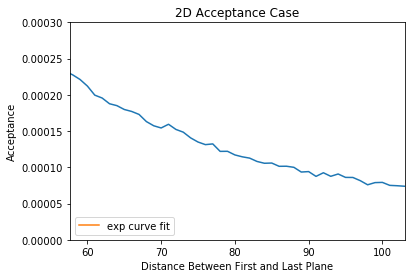

0.992313414271 1.21315530192 0.00222752412512
0.0002121


In [3]:
#np.savetxt('acc103.txt', np.transpose(np.asarray(acc)))
acc103 = np.loadtxt('acc103.txt', unpack = True)


popt, pcov = curve_fit(expfunc, range(104), acc103, p0=[.05 , .05 , .05])
plt.plot(range(104), acc103)
plt.plot(np.linspace(0,104, 208), expfunc(np.linspace(0,104,208), *popt), label ='exp curve fit')
plt.legend()
plt.xlim(0,20)
plt.title('2D Acceptance Case')
plt.ylabel('Acceptance')
plt.xlabel('Distance Between First and Last Plane')
plt.xlim(57.6,103)
plt.ylim(0,.0003)
plt.show()

print(*popt)
print(acc103[60])


In [4]:
 %%time
def accnumint(L, w1, w2):
    acceptance = []
    for h in L:
        num = 0
        den = 0
        l = h
        print(h)
        for i in range(10000):
            #print(i)
            x0 = np.random.uniform(0.,w1)
            y0 = np.random.uniform(0., w2)
            for j in range(10000):
                phi = np.random.uniform(0., np.pi)
                phi2 = np.random.uniform(0, np.pi)
                if 0 < l*np.tan(phi) + x0 and  l*np.tan(phi) + x0 < w1 and 0 < l*np.tan(phi2) + y0 and  l*np.tan(phi2) + y0 < w2:
                    num+=1 
                den+=1
        #print (num)
        #print(den)
        acceptance.append(num/den)
    return(acceptance)
    print(acceptance)

xdist6 = [(x*6. + 60.) for x in range(86,189)]

acc = accnumint(xdist6,20.3,16.8)

plt.plot(xdist6, acc)
plt.xlabel('Distance Between First and Last Planes')
plt.ylabel('Acceptance')
plt.show()


576.0


KeyboardInterrupt: 